In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
plot <-read.csv("cleaned_data.csv")

Warning message:
"Removed 4 rows containing missing values (`geom_point()`)."


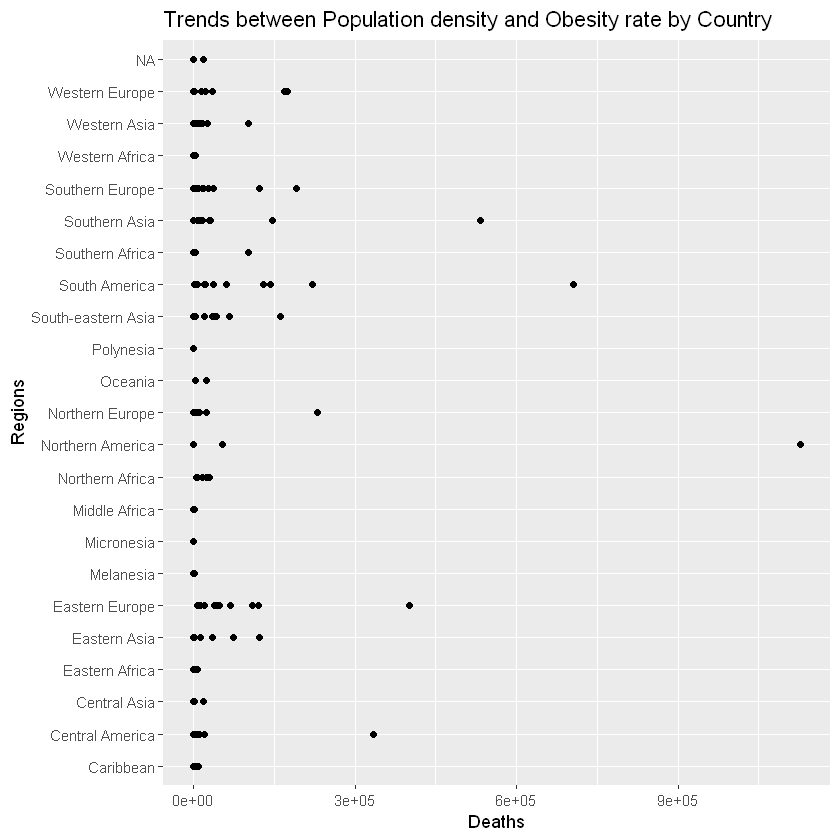

In [3]:
#creating a scatter plot to show the trend between density and obesity rate by country
ggplot(plot, aes( x = Region.x, y =Deaths))+
geom_point() + labs(x= "Regions", y= "Deaths")+
ggtitle("Trends between Population density and Obesity rate by Country")+coord_flip()

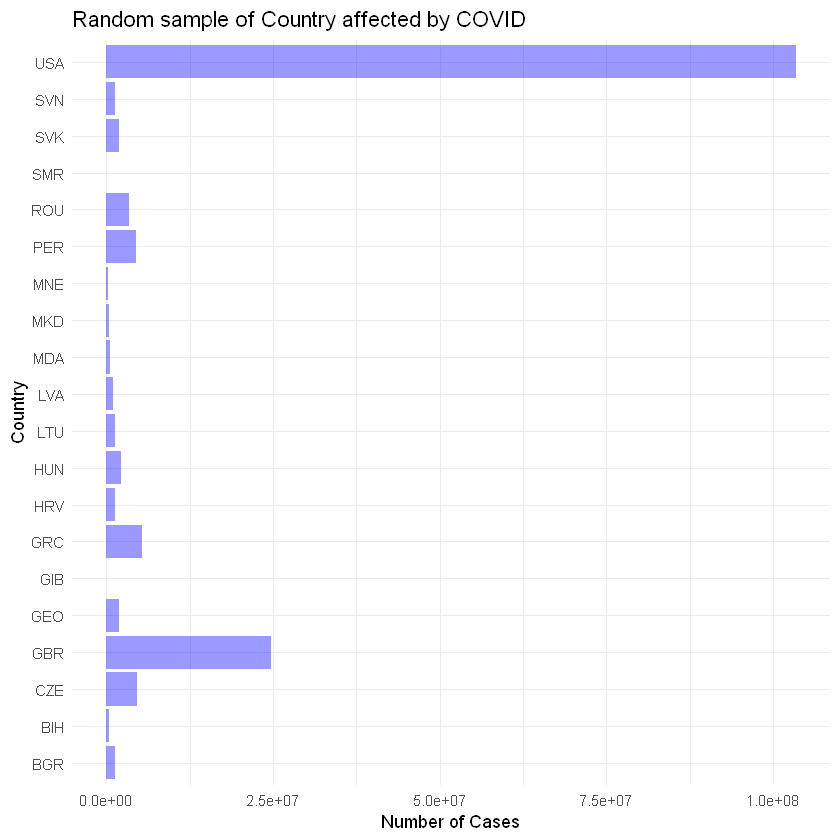

In [4]:
#bar chart to present any 20 countries affected by COVID
top_n <- 20
top_countries <- head(plot, top_n)
ggplot(top_countries, aes(x= Cases, y= iso3c))+
geom_bar(stat = "identity", fill= "blue", alpha= 0.4)+
labs(x= "Number of Cases",
     y="Country")+
ggtitle("Random sample of Country affected by COVID") +
theme_minimal()

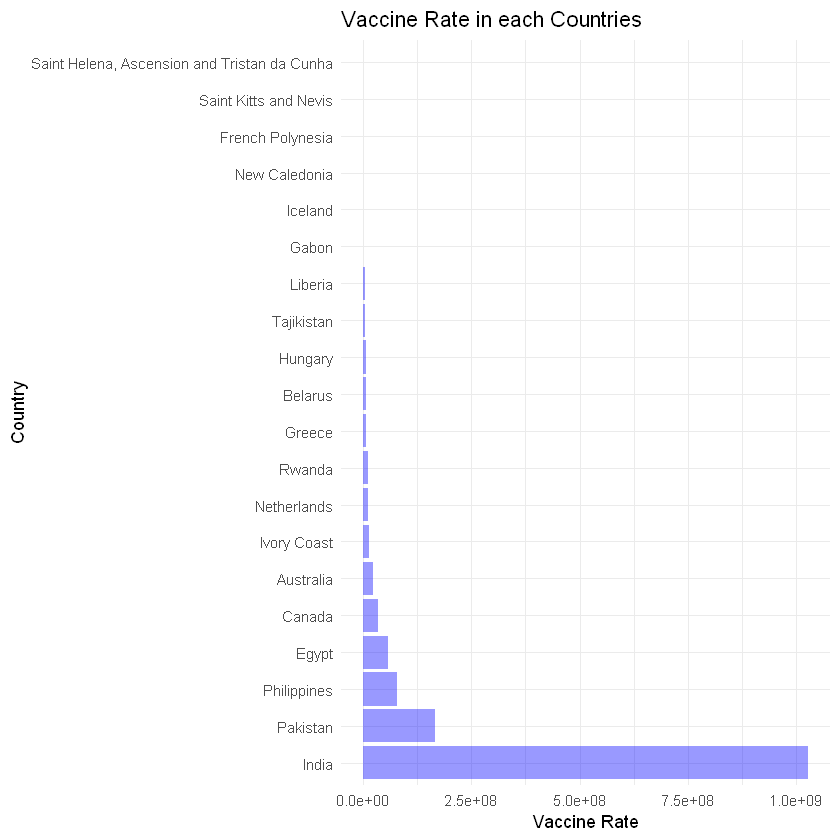

In [5]:
#random bar chart based on country to chow the Vaccine rate
random_country <- sample(plot$Country.x, size = 20)
plot_country <- plot[plot$Country.x %in% random_country, ]
ggplot(plot_country, aes(x=reorder( Country.x, -Vaccinated), y= Vaccinated))+
geom_bar(stat = "identity", fill= "blue", alpha= 0.4)+
labs(x= "Country",
     y="Vaccine Rate")+
ggtitle("Vaccine Rate in each Countries")+
theme_minimal()+ coord_flip()

Warning message:
"Removed 15 rows containing missing values (`position_stack()`)."


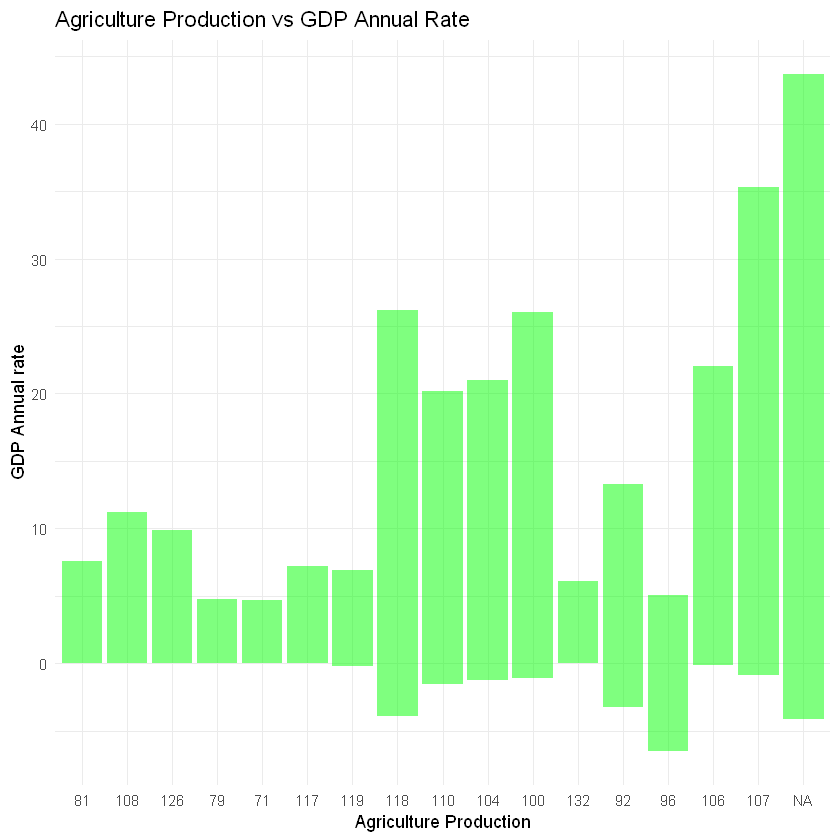

In [6]:
#trend between Agriculture producion vs GDP annual rate
random_agriculture <- sample(plot$Agricultural.production.index..2014.2016.100., size = 20)
plot_agriculture <- plot[plot$Agricultural.production.index..2014.2016.100. %in% random_agriculture, ]
ggplot(plot_agriculture, aes(x = reorder( Agricultural.production.index..2014.2016.100., -GDP.growth.rate..annual....const..2015.prices.), 
                                         y = GDP.growth.rate..annual....const..2015.prices.))+
       geom_bar(stat = "identity", fill = "green", alpha = 0.5)+
       labs(x = "Agriculture Production",
            y = "GDP Annual rate")+
        ggtitle("Agriculture Production vs GDP Annual Rate")+
       theme_minimal()

Warning message:
"Removed 4 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 4 rows containing missing values (`geom_text()`)."


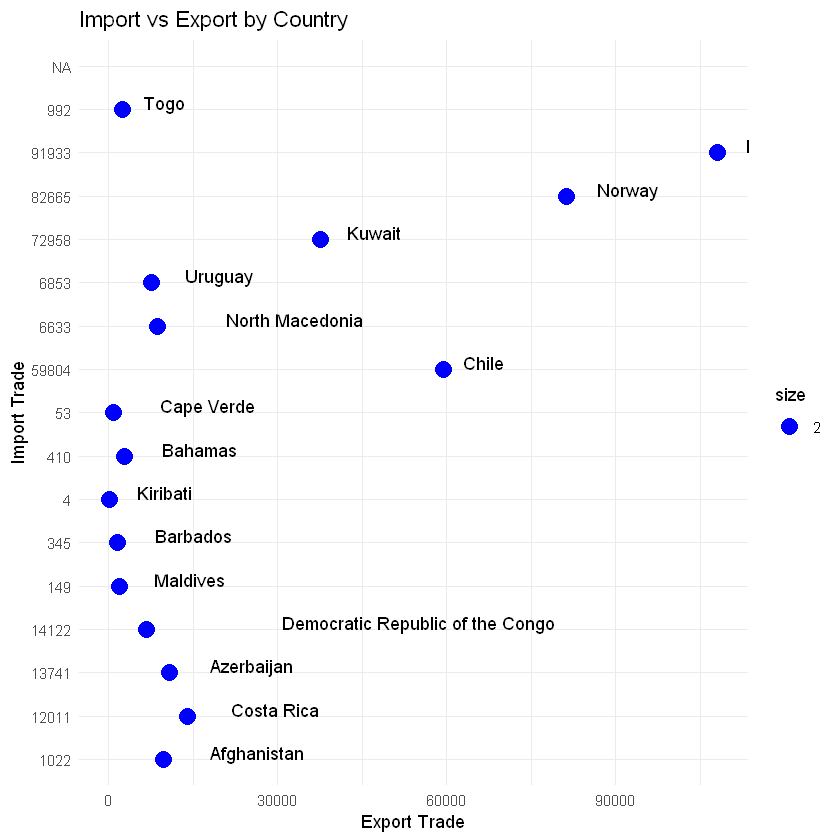

In [7]:
#creating a random data frame code using sample function to get different plot experience while running the cell
random_df <- sample(1:nrow(plot), size = 20)
sample_plots <- plot[random_df, ]
ggplot(sample_plots, aes(x = International.trade..imports..million.current.US..,
                 y = International.trade..exports..million.current.US.., label = Country)) +
  geom_point(aes(size = 2), alpha = 1, color = "blue") +
  geom_text(hjust = -0.5, vjust = 0) +
  labs(y = "Import Trade", x = "Export Trade") +
  ggtitle("Import vs Export by Country") +
  theme_minimal()

Warning message:
"Removed 33 rows containing missing values (`geom_point()`)."


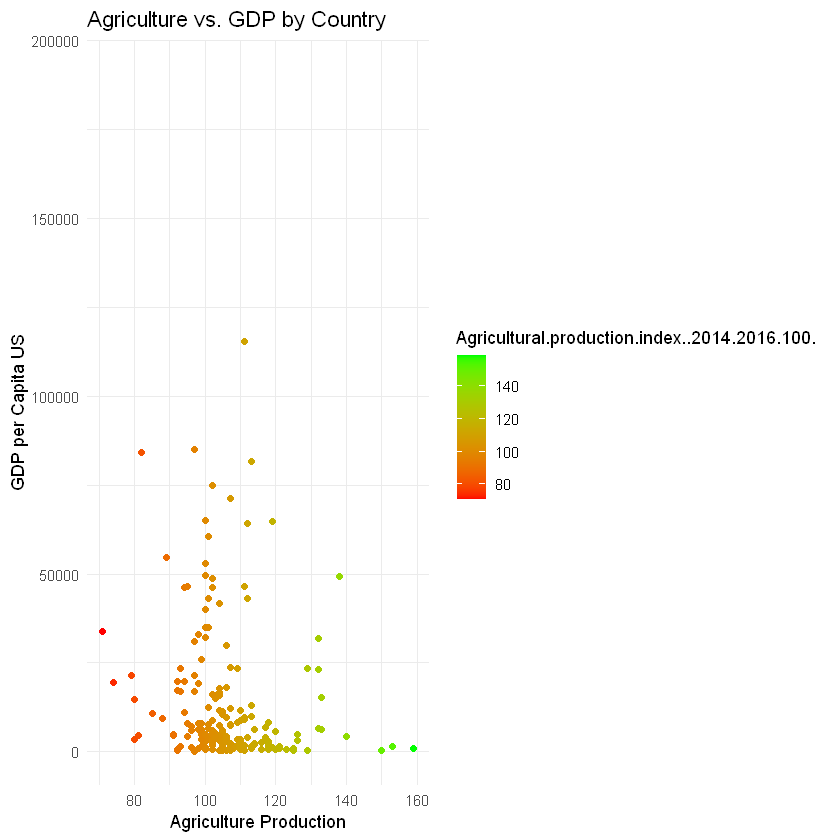

In [8]:
#plotting a scatter plot to show the agricultural production vs GDP by country
ggplot(plot, aes(x = Agricultural.production.index..2014.2016.100., y = GDP.per.capita..current.US.., label = Country)) +
  geom_point(aes(color = Agricultural.production.index..2014.2016.100.), alpha = 1) +
   labs(x = "Agriculture Production", y = "GDP per Capita US") +
  ggtitle("Agriculture vs. GDP by Country") +
  theme_minimal() +
  scale_color_gradient(low = "red", high = "green")

Warning message:
"Removed 1 rows containing non-finite values (`stat_boxplot()`)."


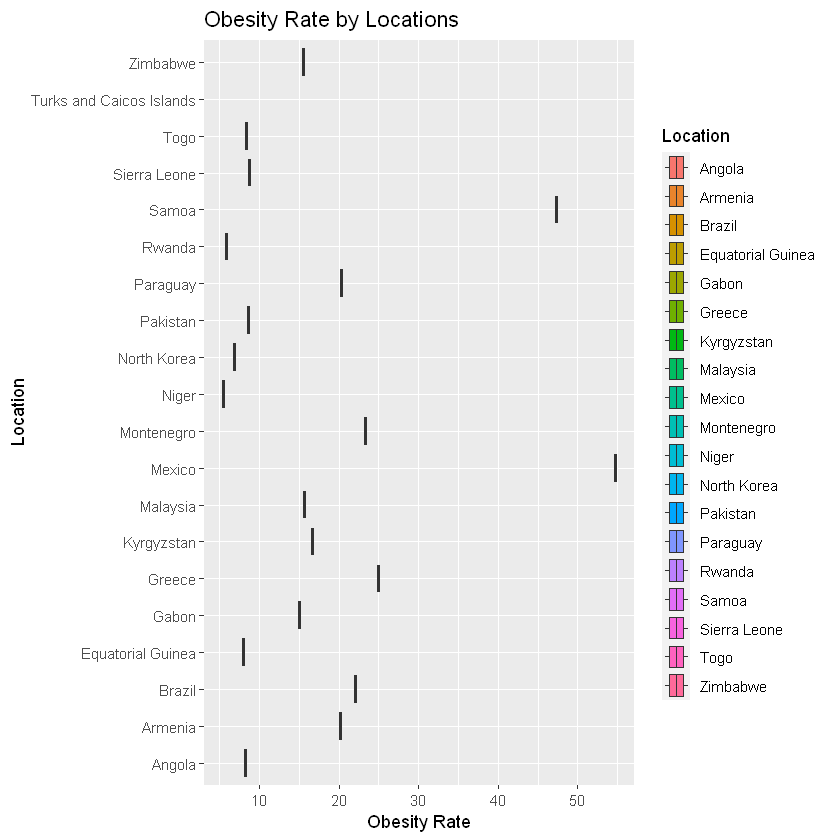

In [9]:
#creating a graph to showcase the trend in Obesity rate in the countries using boxplot
random_df <- sample(1:nrow(plot), size = 20)
sample_plots <- plot[random_df, ]
ggplot(sample_plots, aes(x = Obesity.rate...., y = Location, fill = Location))+
geom_boxplot()+
labs(x = "Obesity Rate", 
     y = "Location")+
ggtitle("Obesity Rate by Locations")

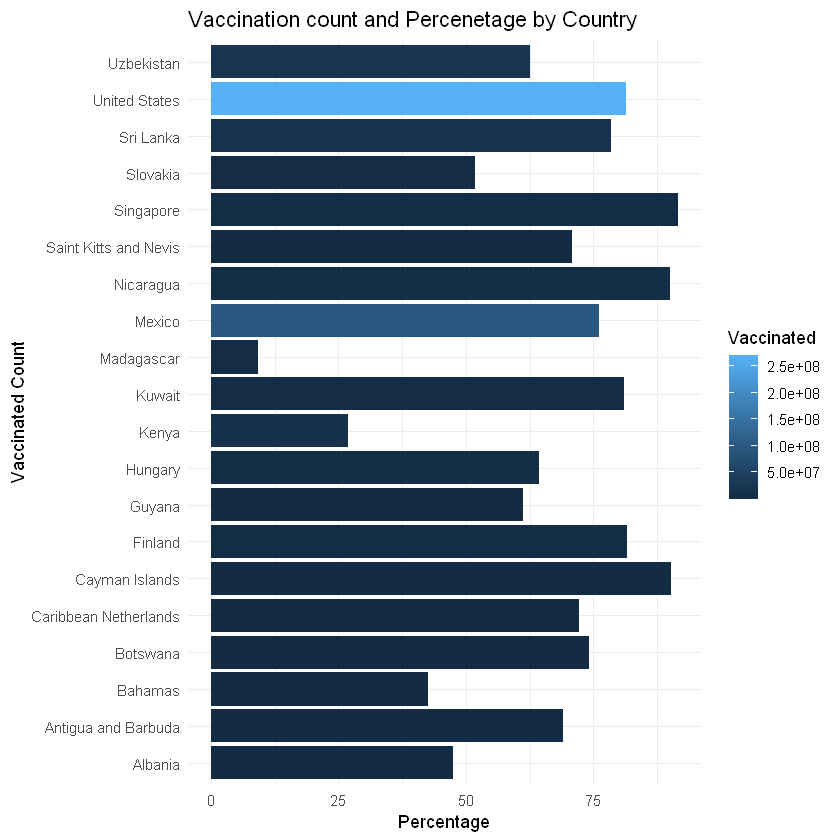

In [10]:
#trend in vaccination count and percentage
random_df <- sample(1:nrow(plot), size = 20)
sample_plots <- plot[random_df, ]
ggplot(sample_plots, aes(x = Location, y = Percent, fill = Vaccinated))+
geom_bar(stat = "identity")+
labs(x = "Vaccinated Count",
     y = "Percentage")+
ggtitle("Vaccination count and Percenetage by Country")+
theme_minimal() + coord_flip()

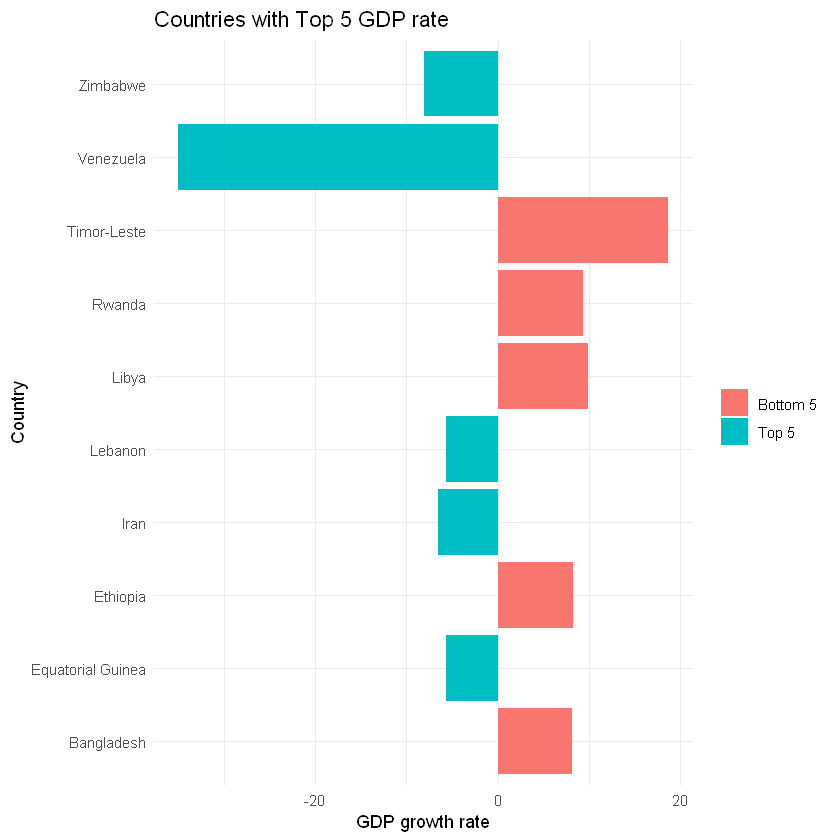

In [55]:
#filtering and ordering top 5 countries with maximum and minimum GDP growth rates and plotting a bar graph
high_GDP <- head(filter_GDP[order(-filter_GDP$GDP.growth.rate..annual....const..2015.prices.), ], 5)
low_GDP <- head(filter_GDP[order(filter_GDP$GDP.growth.rate..annual....const..2015.prices.), ], 5)
combined_GDP <- rbind(high_GDP, low_GDP)
ggplot(combined_GDP, aes(x = Country.x, y = GDP.growth.rate..annual....const..2015.prices.))+
geom_bar(stat = "identity", aes(fill = ifelse(rank(GDP.growth.rate..annual....const..2015.prices.) <= 5, "Top 5", "Bottom 5")))+
labs(title = "Countries with Top 5 GDP rate",
     x = "Country",
     y = "GDP growth rate") +
theme_minimal()+
theme(legend.title = element_blank())+
coord_flip()

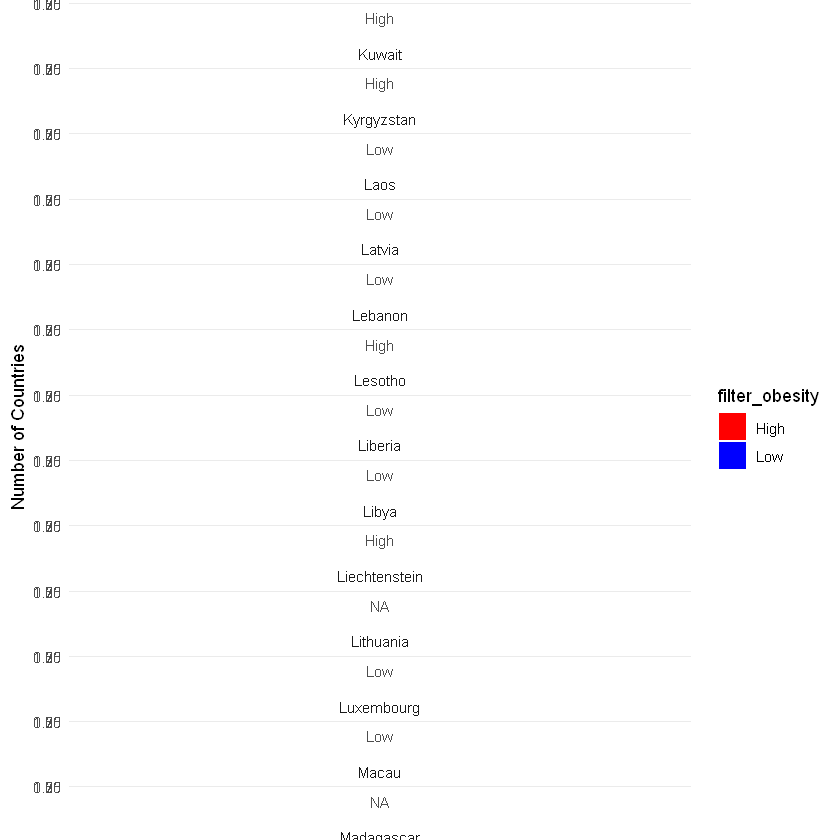

In [72]:
filter_Obesity_GDP <- plot[!is.na(plot$Obesity.rate....) & !is.na(plot$GDP.per.capita..current.US..), ]
rich_GDP <- quantile(plot$filter_Obesity_GDP, 0.75)
#categorize high and low Obesity rate
plot$filter_obesity <- ifelse(plot$Obesity.rate....>=30, "High", "Low")
#creating a bar plot based on obesity rate with rich countries
ggplot(plot, aes(x = filter_obesity, fill = filter_obesity))+
geom_bar()+
facet_wrap(~Country.x, scales = "free", ncol = 1)+
labs(title = "Obesity rate in Rich Countries",
     x = "Obesity Rate",
     y = "Number of Countries")+
  scale_fill_manual(values = c("High" = "red", "Low" = "blue")) +
theme_minimal()+
  theme(axis.text.x = element_text(angle = 0, hjust = 0.5))
